<a href="https://colab.research.google.com/github/Jung1016/python/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

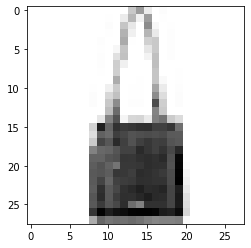

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist
from keras.utils import to_categorical

import os

plt.imshow(x_train[200], cmap = 'Greys')
plt.show()

In [ ]:
import sys

for x in x_train[200]:
  for i in x:
    sys.stdout.write("%-3s" % i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  82 12237 0  5  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  2  0  38 10028 1210  1  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  5  0  86 43 0  13615 0  2  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  2  0  10430 0  10240 0  3  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  3  0  0  1112  0  73 81 0  4  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  2  0  17 87 0  0  45 81 0  4  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  4  0  54 90 0  0  24 92 0  4  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  3  0  76 30 0  0  0  93 0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  1  0  74 0  0  0  0  86 0  0  1  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1090  0  1  0  86 11 0  2  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  2  0  31 79 0  2  2  0  11538 0  4  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  5  0  66 90 0  1  1  0  13658 0  5  0  0 

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[200]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (4, 4), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(32, (4, 4), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4,4)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

modelpath = "./data/model/MNIST_CNN.hdf5"

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 40, batch_size = 150, verbose = 0, callbacks = [early_stopping_callback, checkpointer])

print("\n Test Accuracy : %.4f" % (model.evaluate(x_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.48134, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.48134 to 0.41006, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.41006 to 0.36042, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.36042 to 0.33809, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.33809 to 0.32241, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.32241 to 0.30677, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.30677 to 0.29754, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.29754 to 0.29300, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 9: val_loss improved from 0.29300 to 0.29228, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 10: val_loss improved from 0.29228 to 0.28323, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 11: val_loss improved from

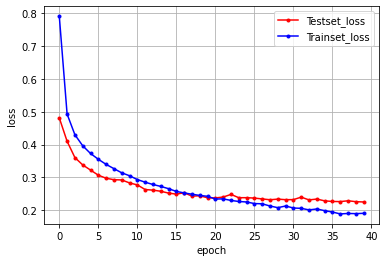

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = "red", label = "Testset_loss")
plt.plot(x_len, y_loss, marker = '.', c = "blue", label = "Trainset_loss")

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()